In [1]:
import sys,os
os.chdir('../../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from subprocess import call
from IC.importer import *
from IC.processer import *
from IC.main import sim_events, list_of_params
from functions import nufit_params_nsi
from src.plotter import P_over_E_parameter, nsi_oscillogram, nsi_flux_oscillogram, save, savethesis
from scipy.stats import chi2
from IC.event_processing import *
import pickle
from multiprocessing import Pool
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
np.set_printoptions(linewidth=200)

In [3]:
IC_range = np.logspace(np.log10(500),4,50)
DC_range = np.logspace(np.log10(5.6),np.log10(56),50)
#ett_range = [-0.1,0,0.1]#np.linspace(-1e-1,1e-1,3)
emm_range = [-1e-1,0,1e-1]#np.linspace(-1e-1,1e-1,3)
emt_range = [-1e-2,0,1e-2]
params = nufit_params_nsi.copy()
anti=True
s24_range = [0.032]
params.update({'theta_24': np.arcsin(np.sqrt(0.032))/2, 'dm_41':0.93, 'theta_34': np.arcsin(np.sqrt(0))/2})
emm_params = list_of_params_nsi(params, s24_range, emm_range)
emt_params = list_of_params_nsi(params, s24_range, [0],emt_range)
both_params = list_of_params_nsi(params, s24_range, emm_range,emt_range)
zenith = -1

'''
Pmm_emm_IC = P_over_E_parameter('m',emm_params,E=IC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emm_range),-1)
Pmm_emt_IC = P_over_E_parameter('m',emt_params,E=IC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)
Pmm_IC = P_over_E_parameter('m',[params],E=IC_range, ndim=4, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)

#Pmm_emm_DC = P_over_E_parameter('m',emm_params,E=DC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emm_range),-1)
#Pmm_emt_DC = P_over_E_parameter('m',emt_params,E=DC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)
#Pmm_DC = P_over_E_parameter('m',[params],E=DC_range, ndim=4, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
'''

"\nPmm_emm_IC = P_over_E_parameter('m',emm_params,E=IC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emm_range),-1)\nPmm_emt_IC = P_over_E_parameter('m',emt_params,E=IC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)\nPmm_IC = P_over_E_parameter('m',[params],E=IC_range, ndim=4, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)\n\n#Pmm_emm_DC = P_over_E_parameter('m',emm_params,E=DC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emm_range),-1)\n#Pmm_emt_DC = P_over_E_parameter('m',emt_params,E=DC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)\n#Pmm_DC = P_over_E_parameter('m',[params],E=DC_range, ndim=4, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)\n"

In [ ]:

'''
One at a time:
    DC:
        e_mm:
            Positive makes resonance somewhat shallower
            No other effects
        e_mt:
            Positive e_mt drastically compresses the curve to the left
            Negative e_mt drastically stretches the curve to the right
    IC:
        e_mm:
            Positive barely compresses the resonance up
            Negative barely stretches the resonance down
        e_mt:
            Positive has no effect in low-E
            Negative banks the curve down, similar to theta_24
            Both barely makes resonance deeper. 
            Both shifts P down in high-E
Both:
    DC: 
        e_mm:
            Positive makes the resonance somewhat shallower
            Negativte deepens the resonance somewhat
        e_mt:
            Positive drastically compresses whole curve to the left
            Negative drastically streches whole curve to the right
        
        
    IC:
        e_mm:
            Positive has no effect here.
            Negative somewhat deepens the resonance
        e_mt:
            Positive has no effect in low-E
            Negative banks the low-E curve down, similar to theta_24
            
        All values of e_mm and e_mt shifts P down at high-E
Conclusion:
    e_mm and e_mt seem independent, since they affect P in the same way irrespective of the others value. I.e. strechting of DC P by e_mt happens irrespective of e_mm.
    DC:
        e_mt has a drastic stretching. 
        e_mm barely deepens the resonance dip 
    IC:
        Almost neglible effect at resonance.
        Negative e_mt pulls P down at low-E
        All e pulls P down at high-E
    For Pmm, the behavior is the same when we flip signs on e. Pmm has no resonance of course, but behavior in low-E and high-E is intact.
    Looking at the contour plots, we see that e' and e_mt are independent for low values (<1e-2), and this is what i see in the P plots as well. 
'''

In [3]:
z_range = np.linspace(-1,0,20)
IC_range = np.logspace(np.log10(500),4,10)

#P_emm_IC= [nsi_oscillogram(all_range, z_range, p) for p in emm_params]
P_emt_IC= [nsi_oscillogram(all_range, z_range, p) for p in emt_params]

#P_emm_DC= [oscillogram(DC_range, z_range, p, nsi=True) for p in emm_params]
#P_emt_DC= [oscillogram(DC_range, z_range, p, nsi=True) for p in emt_params]

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Text(0.5, 0.98, '$\\bar{\\nu}_\\mu$ disappearance, DC')

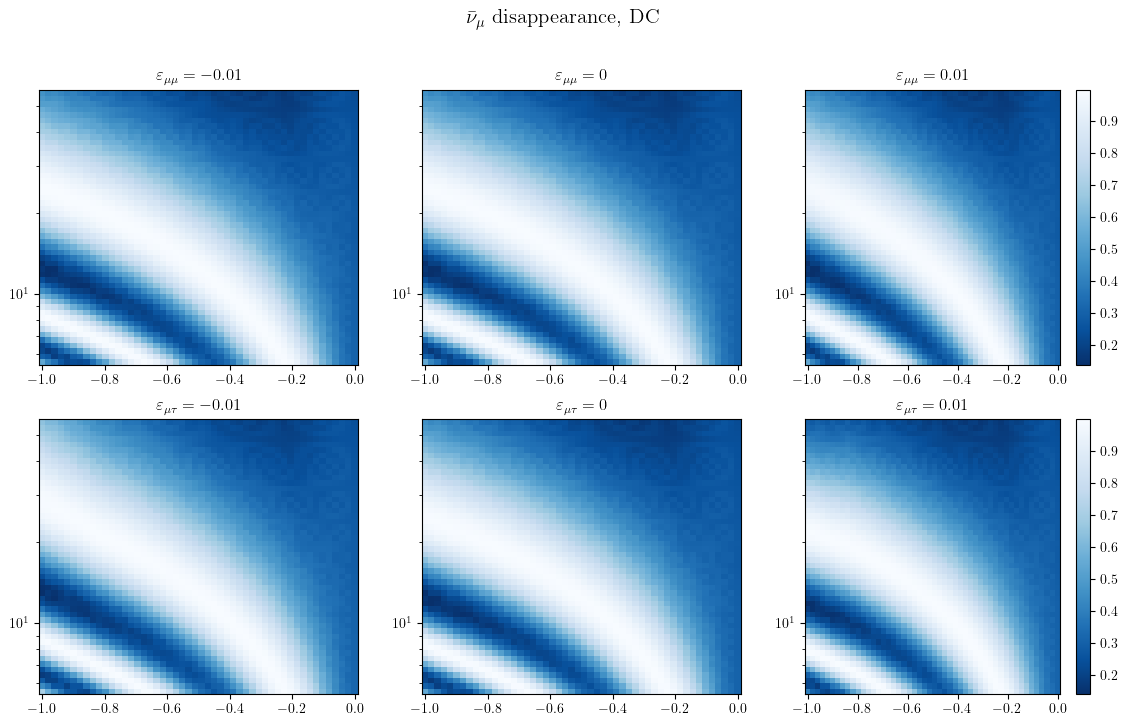

In [51]:
fig, ax = plt.subplots(2,3, figsize=(3.5*4,8))
ax = ax.flatten()
for i in range(3):  
    ax[i].set_title(rf'$\varepsilon_{{\mu\mu}} = {emm_params[i]["e_mm"]}$')
    c=ax[i].pcolormesh(z_range, DC_range,P_emm_DC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i].set_yscale('log')

    ax[i+3].set_title(rf'$\varepsilon_{{\mu\tau}} = {emt_params[i]["e_mt"]}$')
    c=ax[i+3].pcolormesh(z_range, DC_range,P_emt_DC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i+3].set_yscale('log')

    if i == 2:
        fig.colorbar(c, ax=ax[i])
        fig.colorbar(c, ax=ax[i+3])
fig.suptitle(r'$\bar{\nu}_\mu$ disappearance, DC', fontsize=15)

In [3]:
filename = '../NuFSGenMC_nominal.dat'
df = pd.read_csv(filename, delimiter=' ', names= ['pdg', 'Ereco', 'zreco', 'Etrue', 'ztrue', 'mcweight', 'flux_pion', 'flux_kaon'], skiprows=12)
df.query('Ereco == Ereco.min()')['Etrue'].quantile(0.1)
Ebins = 500*10**np.linspace(0,1.3,14)
df['Ebin'] = pd.cut(df.Ereco,Ebins,labels=False)
#df = df.groupby('Ebin').
#df.query('Ebin == 0.0').Etrue.quantile(0.1)
from IC.processer import get_Etrue, get_interpolators
_,_,model = get_interpolators()
get_Etrue(model, 3,0.995,0.995,E_index=0)[0][0]

(array([ 284.276,  745.293, 1953.95 ]),
 array([6.569, 6.604, 6.663]),
 array([0.357, 0.356, 0.355]))

In [16]:
get_Etrue(model, 3,0.995,0.995,E_index=0)[0][0]

284.276466762975

In [18]:
get_Etrue(model, 3,0.995,0.995,E_index=12)[0][2]

103821.37459903302

In [4]:
get_Etrue(model, 3,0.99,0.99,E_index=0)

(array([ 310.745,  745.443, 1788.238]),
 array([6.569, 6.604, 6.663]),
 array([0.357, 0.356, 0.355]))

In [4]:
filename = '../NuFSGenMC_nominal.dat'
df = pd.read_csv(filename, delimiter=' ', names= ['pdg', 'Ereco', 'zreco', 'Etrue', 'ztrue', 'mcweight', 'flux_pion', 'flux_kaon'], skiprows=12)
df.sample(10).to_latex('t.tex')

In [10]:
from DC.importer import MC2018_DC
#MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.01)
MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(0.005)

13.164715576171876

In [12]:
z_range = np.linspace(-1,0,500)
IC_range = np.logspace(np.log10(500),4,5)
all_range = np.logspace(np.log10(1),5.1,500)
#flux_emt_IC_track= np.array(nsi_flux_oscillogram(all_range, z_range, emt_params[0], only_m=True))
#flux_emt_IC_cascade= np.array(nsi_flux_oscillogram(all_range, z_range, emt_params[0], only_m=False))
flux_emt_IC_track = pickle.load(open('./pre_computed/P_emt_IC_track.p','rb'))
flux_emt_IC_cascade = pickle.load(open('./pre_computed/P_emt_IC_cascade.p','rb'))

In [11]:
MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)

1.9329288434982304

In [14]:
MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)

1.9329288434982304

In [15]:
MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(1-0.005)

210.22446929931684

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-0.6, vmax=1.6)
        fig.colorbar(psm, ax=ax)
    plt.show()

In [ ]:
track_cmap_dict = {'red':  ((0.0, 0.0, 0),
                   (0.32, 1.0, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

          'green': ((0.0, 0.0, 0.3),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.1, 0.1),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 0.6),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.1, 0.1),
                    (1.0, 0.0, 0.0))
          }

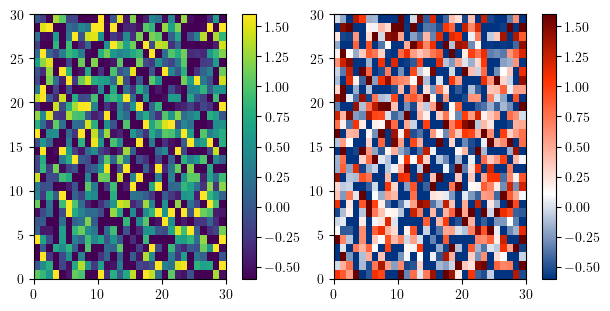

In [248]:
from matplotlib.colors import CenteredNorm
from matplotlib.colors import LinearSegmentedColormap
track_cmap_dict = {'red':  ((0.0, 0.0, 0),
                   (0.25, 1.0, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

          'green': ((0.0, 0.1, 0.2),
                    (0.25, 1.0, 1.0),
                    (0.75, 0.2, 0.2),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.1, 0.5),
                    (0.25, 1.0, 1.0),
                    (0.75, 0.0, 0.0),
                    (1.0, 0.0, 0.0))
          }
track_cmap_dict = {'red':  ((0.0, 0.0, 0),
                   (0.32, 1.0, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

          'green': ((0.0, 0.1, 0.2),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.2, 0.2),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.1, 0.5),
                    (0.32, 1.0, 1.0),
                    (0.75, 0.0, 0.0),
                    (1.0, 0.0, 0.0))
          }
track_cmap = LinearSegmentedColormap('BlueRed1', track_cmap_dict)
cascade_cmap = LinearSegmentedColormap('BlueRed1', cascade_cmap_dict)
plot_examples([viridis, track_cmap])

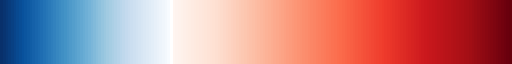

In [161]:
bottom = cm.get_cmap('Blues_r', 64)
top = cm.get_cmap('Reds', 128)

newcolors = np.vstack((bottom(np.linspace(0, 1, 64)),
                        (1,1,1,1),
                       top(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
newcmp

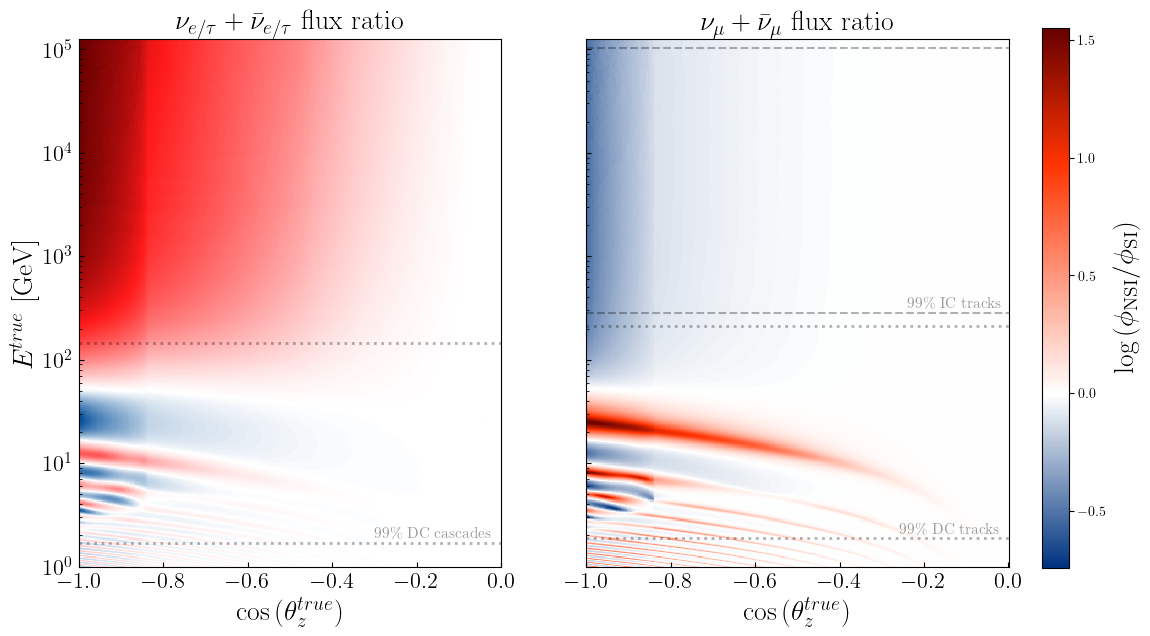

In [253]:
fig, ax = plt.subplots(1,2, figsize=(6*2,7), sharex=True,sharey=True, squeeze=True)

c1=ax[0].pcolormesh(z_range, all_range,np.log10(flux_emt_IC_cascade[2].T),cmap=cascade_cmap,edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)#) norm = CenteredNorm(0),
c2=ax[1].pcolormesh(z_range, all_range,np.log10(flux_emt_IC_track[2].T),cmap=track_cmap,edgecolor=None, shading = 'auto', rasterized=True)# vmin=-1,vmax=3)# 

ax[0].set_title(r'$\nu_{e/\tau} + \bar\nu_{e/\tau}$ flux ratio', fontsize=20)
ax[1].set_title(r'$\nu_\mu + \bar\nu_\mu$ flux ratio', fontsize=20)
ax[0].set_xlabel(r'$\cos{(\theta^{true}_z)}$', fontsize=20)
ax[1].set_xlabel(r'$\cos{(\theta^{true}_z)}$', fontsize=20)
ax[0].tick_params(labelsize=16, direction='in', which='both', axis='both')
ax[1].tick_params(labelsize=16, direction='in', which='both', axis='both')
ax[0].set_ylabel(r'$E^{true}\,\,\mathrm{[GeV]}$', fontsize=20)
ax[0].set_yscale('log')
ax[1].set_yscale('log')

cax = fig.add_axes([0.8, 0.11, 0.15, 0.8])
cbar = plt.colorbar(c2, ax=cax, pad=0.35)
cbar.set_label(r'$\log{(\phi_\text{NSI}/\phi_\text{SI})}$', fontsize=20)
_=cax.axis('off')

ax[0].text(-0.30,1.9,'99\% DC cascades',rotation=0,fontsize=11,alpha = 0.4)
ax[0].axhline(1.7, color='black', alpha=0.3,ls=':', lw=2) # MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)
ax[0].axhline(145, color='black', alpha=0.3,ls=':', lw=2) # MC2018_DC().query('pid==0').query('abs(pdg) != 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(1-0.005)

ax[1].text(-0.26,2.1,'99\% DC tracks',rotation=0,fontsize=11,alpha = 0.4)
ax[1].axhline(1.9, color='black', alpha=0.3,ls=':', lw=2) # MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)
ax[1].axhline(210, color='black', alpha=0.3,ls=':', lw=2) # MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.max()')['true_energy'].quantile(1-0.005)


ax[1].text(-0.24,320,'99\% IC tracks',rotation=0, fontsize=11, alpha = 0.4)
ax[1].axhline(284, color='black', alpha=0.3, ls='--')#get_Etrue(model, 3,0.995,0.995,E_index=0)[0][0]
ax[1].axhline(103821, color='black', alpha=0.3, ls='--') #get_Etrue(model, 3,0.995,0.995,E_index=12)[0][2]
#plt.savefig('./article/figures/flux_ratio.pdf', bbox_inches="tight")